#### Syntetic Data Cleaning

**Name:** Adiel Nefthali Delgado Silva


#### Import Libraries

In [868]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

#### Read Dataset

In [869]:
#Define our Dataset Using the Synthetic Data...csv
df = pd.read_csv("Synthetic_Data_Cleaning_example.csv")

# Exploratory Data Analysis

In [870]:
#Info about our Dataset, its columns, type of data save on each feature and more
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         103 non-null    float64
 1   Income      103 non-null    float64
 2   Gender      84 non-null     object 
 3   Registered  103 non-null    float64
 4   City        103 non-null    object 
dtypes: float64(3), object(2)
memory usage: 4.2+ KB


In [871]:
#It describe the statistics that our dataset has
df.describe()

,Age,Income,Registered
count,103.000000,103.000000,103.000000
mean,29.573987,51079.867179,0.504854
std,13.137300,21167.304578,0.502421
min,-5.000000,-1000.000000,0.000000
25%,23.988273,37726.305475,0.000000
50%,28.843517,51028.444622,1.000000
75%,34.967142,58315.989946,1.000000
max,120.000000,200000.000000,1.000000


In [872]:
#Show the first 5 rows of the Dataset
df.head()

,Age,Income,Gender,Registered,City
0,34.967142,28769.438869,Male,1.0,New York
1,28.617357,43690.320159,Female,0.0,Paris
2,36.476885,44859.282252,MALE,1.0,Tokyo
3,45.230299,37965.840962,FEMALE,0.0,Berlin
4,27.658466,47580.714325,male,1.0,New York


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Registered'}>, <Axes: >]], dtype=object)

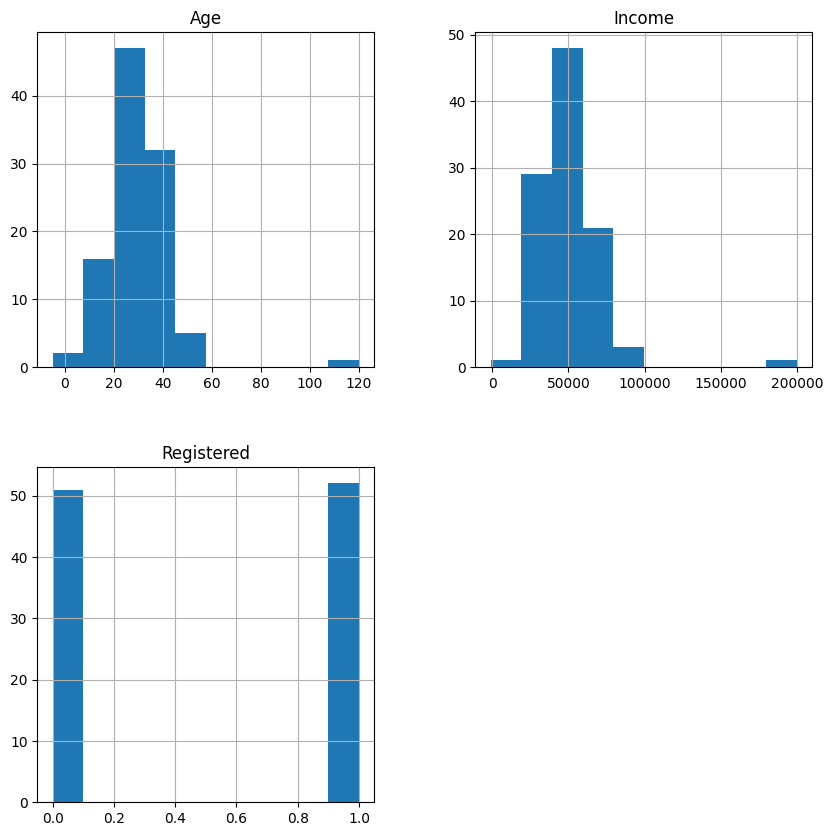

In [873]:
#Show a histogram of the Dataset, that describes in a chart how the values of all INT columns has in each
#instance
df.hist(figsize=(10,10))

### ^
#### As we can see above in the histogram, we have a few outliers in the Age & Income Feature than we need to clean up, in order to have a clean DataSet

In [874]:
#Show the quantity of instances that the Dataset has
df.shape

(104, 5)

#### Who is the richest person in the Dataset

In [875]:
df.loc[df["Income"].idxmax()]

Age              120.0
Income        200000.0
Gender            Male
Registered         NaN
City          New York
Name: 100, dtype: object

#### Who is the poorest person in the Dataset

In [876]:
df.loc[df["Income"].idxmin()]

Age             -5.0
Income       -1000.0
Gender        Female
Registered       1.0
City             NaN
Name: 101, dtype: object

#### Top 10 richest person in the Dataset

In [877]:
filtered_df = df[['Gender', 'Income']].sort_values(by='Income', ascending=False).head(10)
filtered_df.sort_values(by='Income', ascending=False).head(10)

,Gender,Income
100,Male,200000.000000
79,NaN,90802.537499
13,FEMALE,86948.631687
25,female,82856.834387
67,Femael,78451.894740
6,femle,78292.788518
56,femle,77986.617667
35,female,73249.016075
77,Femael,71803.011157
22,MALE,71041.914664


#### Income mean per city

In [878]:
income_mean_city = df.groupby('City')['Income'].mean().reset_index()

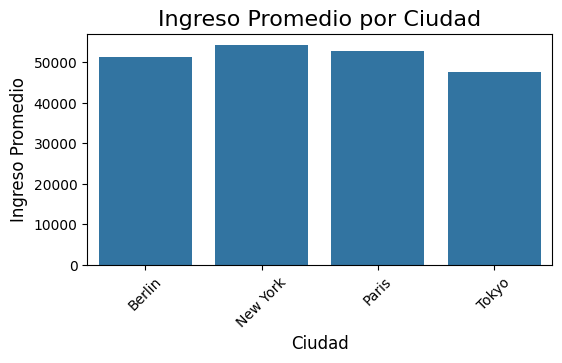

In [879]:
plt.figure(figsize=(6, 3))
sns.barplot(x='City', y='Income', data=income_mean_city)
plt.title('Ingreso Promedio por Ciudad', fontsize=16)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Ingreso Promedio', fontsize=12)
plt.xticks(rotation=45) 
plt.show()

#### Distribution of the Income

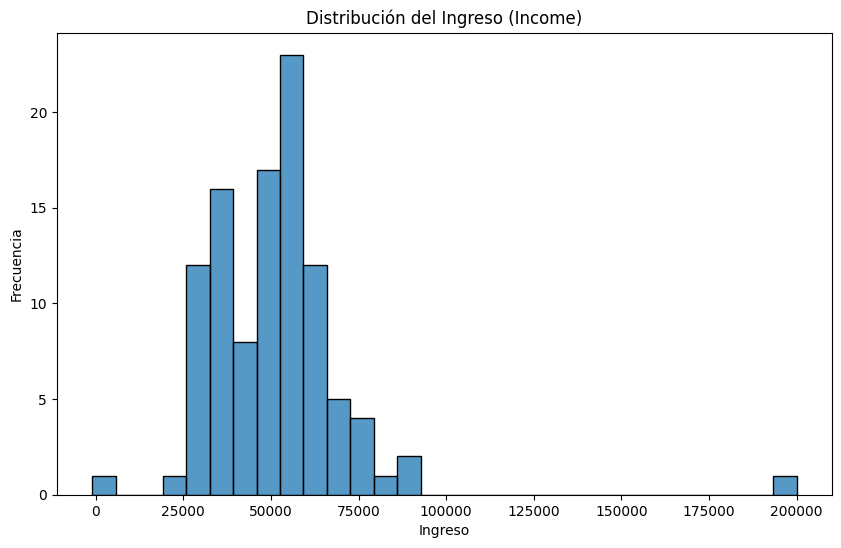

In [880]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=30)
plt.title('Distribución del Ingreso (Income)')
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')
plt.show()

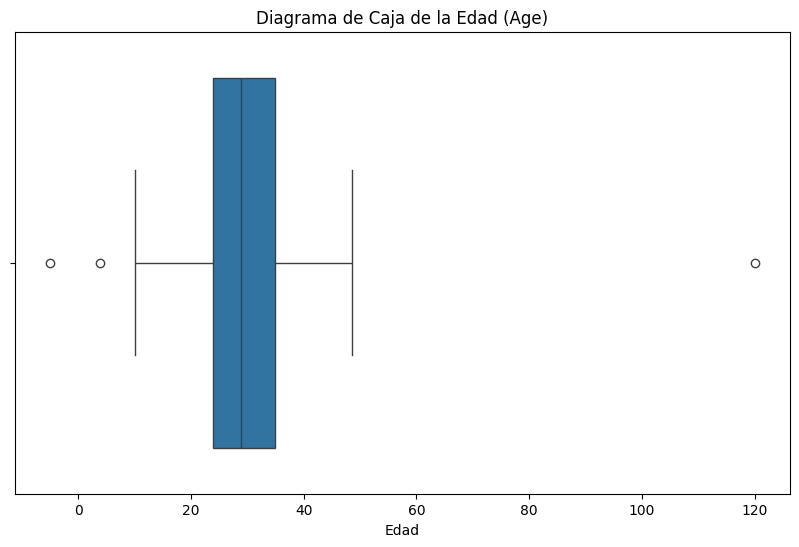

In [881]:
#Boxplot of Age Feature
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Diagrama de Caja de la Edad (Age)')
plt.xlabel('Edad')
plt.show()

#### Person per Gender

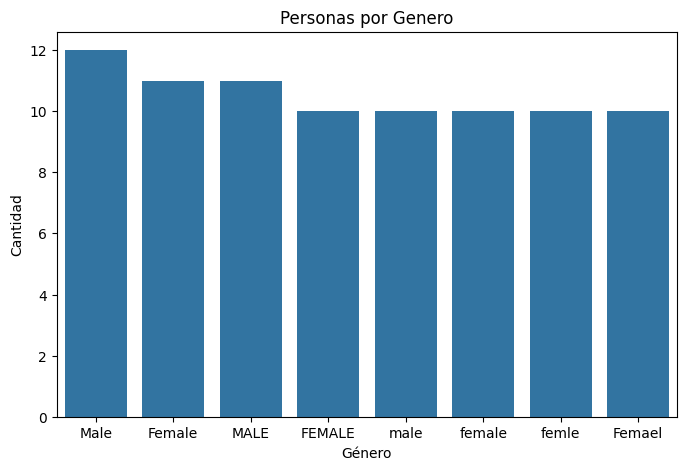

In [882]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df)
plt.title('Personas por Genero')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

#### Person per City

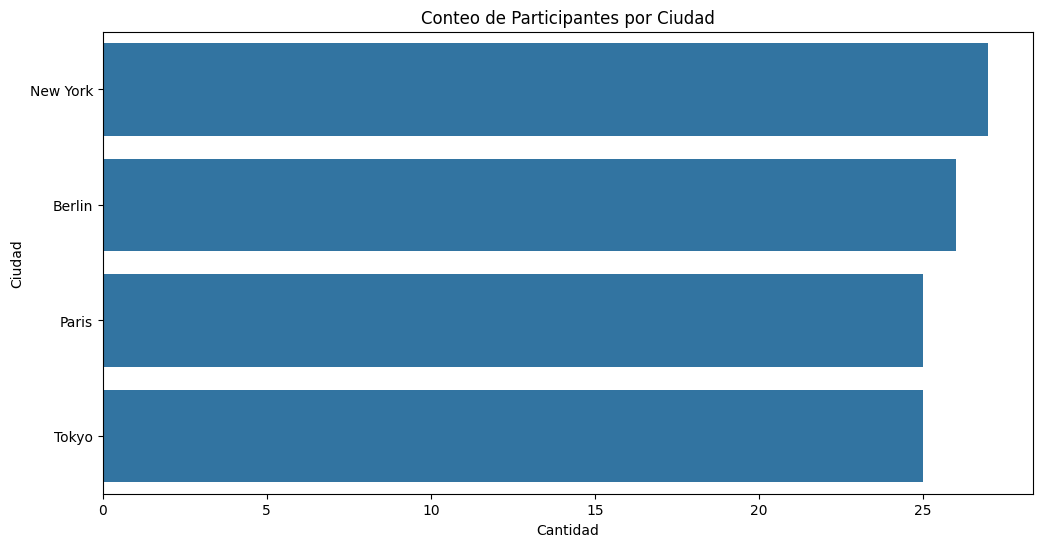

In [883]:
plt.figure(figsize=(12, 6))
sns.countplot(y='City', data=df, order = df['City'].value_counts().index) # 'y' para barras horizontales
plt.title('Conteo de Participantes por Ciudad')
plt.xlabel('Cantidad')
plt.ylabel('Ciudad')
plt.show()

#### Dispertion between Age and Income

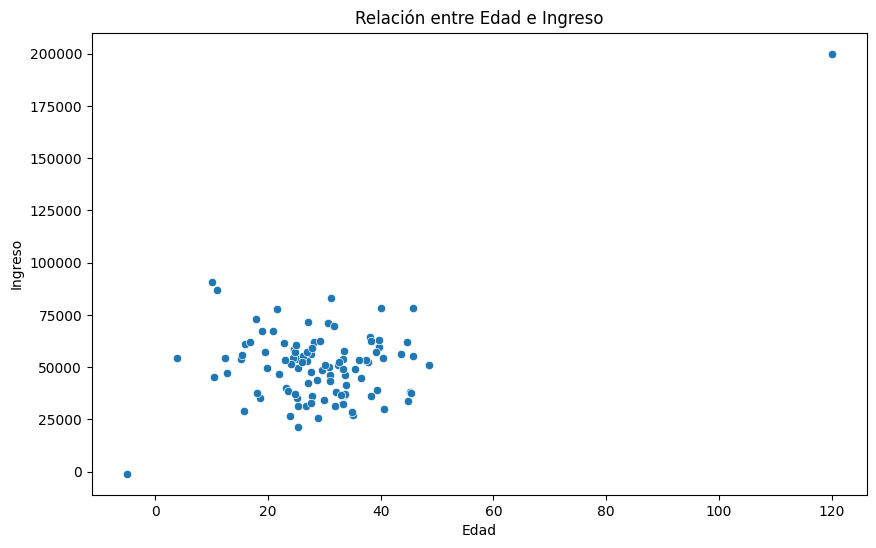

In [884]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', data=df)
plt.title('Relación entre Edad e Ingreso')
plt.xlabel('Edad')
plt.ylabel('Ingreso')
plt.show()

#### Differences between incomes depending on the Gender

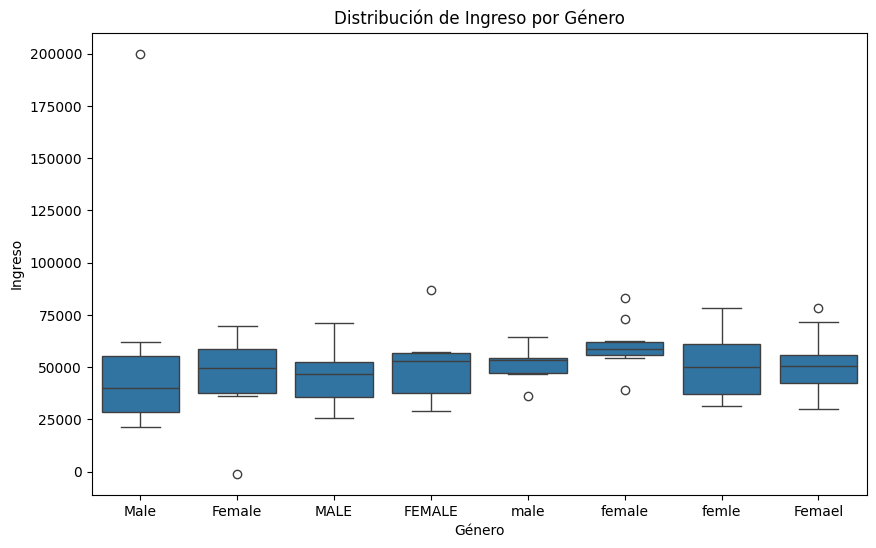

In [885]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Income', data=df)
plt.title('Distribución de Ingreso por Género')
plt.xlabel('Género')
plt.ylabel('Ingreso')
plt.show()

#### Correlation between Income & Age

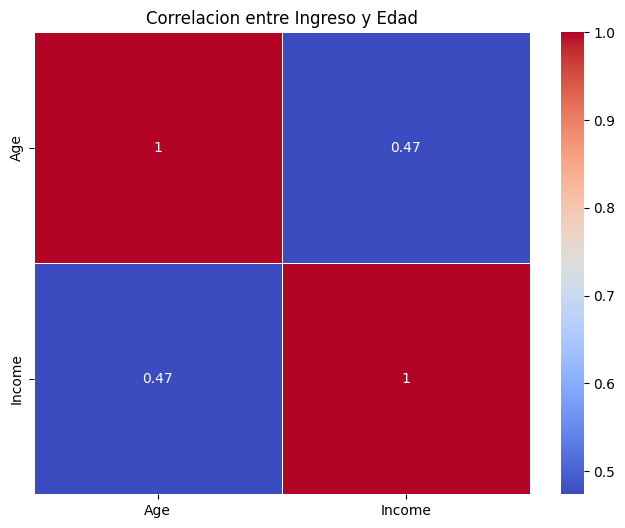

In [886]:
correlation_matrix = df[['Age', 'Income']].corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlacion entre Ingreso y Edad')
plt.show()

# Data Cleaning

#### Before get rid of the outliers, the dataset needs to havo no Null values on it(In case it does have Null values of course)

In [887]:
#Show the quantity of Null or Empty values that the Dataset has, in this case we can figure it out that the gender feature has 20 null values.
df.isnull().sum()

Age            1
Income         1
Gender        20
Registered     1
City           1
dtype: int64

In [888]:
#With those values that are Null, they need to be replaced or in this case deleted, in order to have a better Dataset to use.
df = df.dropna()
df.isnull().sum()

Age           0
Income        0
Gender        0
Registered    0
City          0
dtype: int64

#### The Age feature will be the first to be clean out

In [889]:
#First the age values need to be round, in order to make groups of age, avoiding 31.5 & 31.6 to be different values
df['Age'] = df['Age'].round(0)
df["Age"].value_counts()

Age
25.0    7
33.0    5
28.0    5
31.0    4
38.0    4
27.0    4
45.0    4
18.0    3
32.0    3
23.0    3
40.0    3
34.0    3
29.0    3
35.0    2
36.0    2
46.0    2
24.0    2
22.0    2
39.0    2
19.0    2
30.0    2
15.0    2
26.0    2
13.0    1
20.0    1
16.0    1
11.0    1
49.0    1
37.0    1
10.0    1
41.0    1
44.0    1
4.0     1
Name: count, dtype: int64

<Axes: >

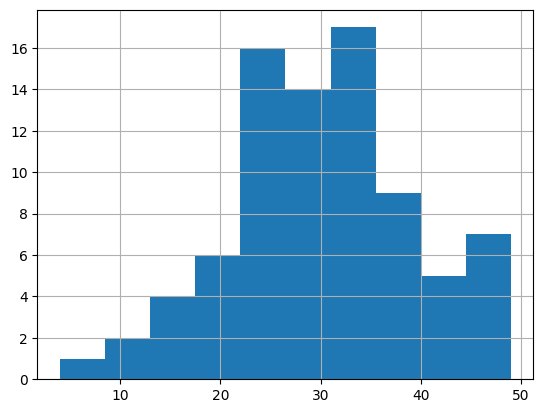

In [890]:
#Now it is obvious that we are getting some information of people, but how is posible to a person under 18 to have any income?
#Then we will delete those instances in order to have a "realistic Dataframe haha"
df["Age"].hist()

<Axes: >

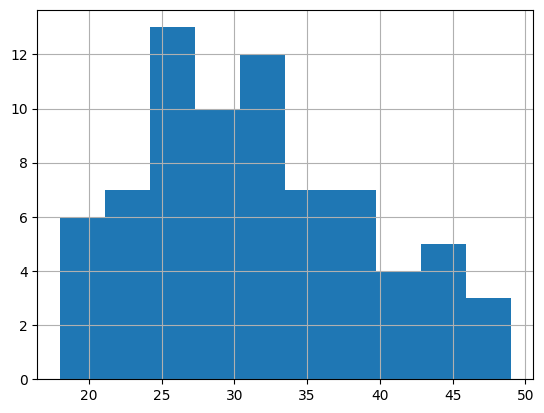

In [891]:
#Modifying the dataset
df["Age"] = df["Age"][((df["Age"] >= 18) & (df["Age"] <= 50))]
df["Age"].hist()

In [892]:
df.shape

(81, 5)

<Axes: >

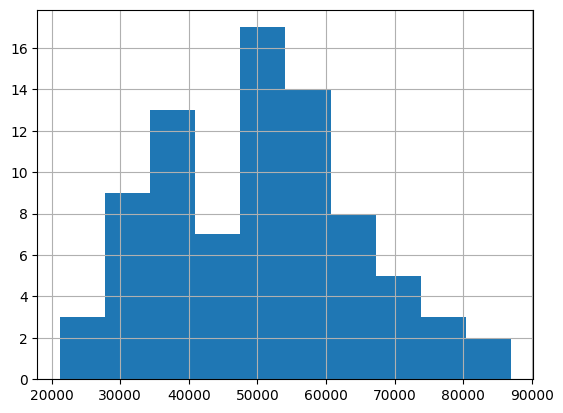

In [893]:
#Now lets check out the income feature
df["Income"].hist()

In [894]:
df["Income"].tail()

94     52597.713888
95     55779.760696
96     36742.138457
97     52305.876589
103    28769.438869
Name: Income, dtype: float64

In [895]:
df['Income'] = df['Income'].round(2)
df["Income"].values

array([28769.44, 43690.32, 44859.28, 37965.84, 47580.71, 56060.76,
       78292.79, 52618.67, 21218.43, 49602.29, 50903.45, 86948.63,
       47114.59, 54523.21, 49479.32, 32469.83, 61865.48, 36359.19,
       71041.91, 28972.23, 58802.86, 82856.83, 35141.96, 41505.53,
       26740.05, 51028.44, 34065.44, 57103.89, 36208.64, 73249.02,
       38251.2 , 45169.08, 53411.9 , 69607.14, 25887.75, 52769.51,
       53898.24, 61727.34, 31445.74, 30193.15, 53757.39, 55196.72,
       39799.63, 53483.81, 54396.09, 39284.73, 77986.62, 57107.49,
       35379.77, 61806.27, 67378.93, 37689.77, 64450.64, 56191.71,
       62330.9 , 78451.89, 36657.28, 37762.85, 48843.47, 55117.28,
       54150.36, 62407.75, 50195.03, 71803.01, 59385.01, 37142.64,
       33936.61, 57237.09, 46648.06, 60710.01, 57098.56, 48907.57,
       43302.28, 62845.98, 53211.41, 31313.92, 52597.71, 55779.76,
       36742.14, 52305.88, 28769.44])

<Axes: >

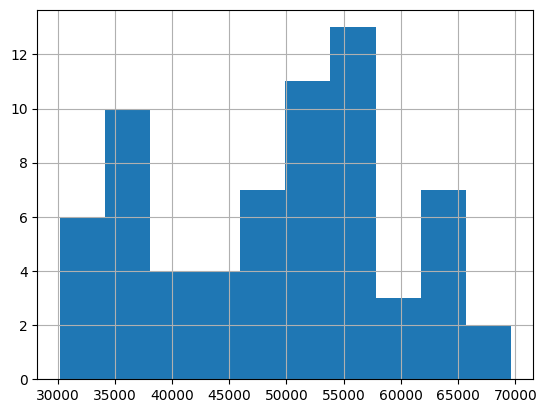

In [896]:
#For better values
df["Income"] = df["Income"][((df["Income"] >= 30000) & (df["Income"] <= 70000))]
df["Income"].hist()

In [897]:
#Now delete all those values that do not match with the parameters that we decided
df = df.dropna()
df.isnull().sum()

Age           0
Income        0
Gender        0
Registered    0
City          0
dtype: int64

In [898]:
df.head()

,Age,Income,Gender,Registered,City
1,29.0,43690.32,Female,0.0,Paris
2,36.0,44859.28,MALE,1.0,Tokyo
3,45.0,37965.84,FEMALE,0.0,Berlin
4,28.0,47580.71,male,1.0,New York
5,28.0,56060.76,female,0.0,Paris


In [899]:
#Looking in the Gender feature 

In [900]:
#There are some issues in this feature, as can be the Upper and Lower values, and even some values with errors
df["Gender"].values

array(['Female', 'MALE', 'FEMALE', 'male', 'female', 'Femael', 'Female',
       'MALE', 'female', 'femle', 'Femael', 'Male', 'Female', 'male',
       'femle', 'Femael', 'Female', 'MALE', 'FEMALE', 'male', 'femle',
       'Male', 'Female', 'FEMALE', 'female', 'femle', 'Femael', 'Male',
       'Female', 'MALE', 'FEMALE', 'male', 'female', 'Femael', 'Male',
       'Female', 'MALE', 'FEMALE', 'male', 'female', 'femle', 'Male',
       'Female', 'MALE', 'FEMALE', 'female', 'femle', 'Male', 'Female',
       'MALE', 'FEMALE', 'male', 'female', 'femle', 'Femael', 'Male',
       'Female', 'MALE', 'FEMALE', 'male', 'femle', 'Femael'],
      dtype=object)

In [901]:
#First lets change the lower case values to upper case
df['Gender'] = df['Gender'].str.upper()
df["Gender"].values

array(['FEMALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE', 'FEMAEL', 'FEMALE',
       'MALE', 'FEMALE', 'FEMLE', 'FEMAEL', 'MALE', 'FEMALE', 'MALE',
       'FEMLE', 'FEMAEL', 'FEMALE', 'MALE', 'FEMALE', 'MALE', 'FEMLE',
       'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMLE', 'FEMAEL', 'MALE',
       'FEMALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE', 'FEMAEL', 'MALE',
       'FEMALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE', 'FEMLE', 'MALE',
       'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMLE', 'MALE', 'FEMALE',
       'MALE', 'FEMALE', 'MALE', 'FEMALE', 'FEMLE', 'FEMAEL', 'MALE',
       'FEMALE', 'MALE', 'FEMALE', 'MALE', 'FEMLE', 'FEMAEL'],
      dtype=object)

In [902]:
df["Gender"].value_counts()

Gender
FEMALE    25
MALE      22
FEMLE      8
FEMAEL     7
Name: count, dtype: int64

# Variable Tranformations


In [903]:
#Now for the Variable Transformation, we are gonna focus in two str fatures, those are City & Gender
df.head()

,Age,Income,Gender,Registered,City
1,29.0,43690.32,FEMALE,0.0,Paris
2,36.0,44859.28,MALE,1.0,Tokyo
3,45.0,37965.84,FEMALE,0.0,Berlin
4,28.0,47580.71,MALE,1.0,New York
5,28.0,56060.76,FEMALE,0.0,Paris


In [904]:
#First lets change those values with error in the Gender Feature (Femle, Femael)
df["Gender"].replace({"FEMAEL":"FEMALE", "FEMLE":"FEMALE"}, inplace=True)
df["Gender"].value_counts()


C:\Users\nefth\AppData\Local\Temp\ipykernel_13952\2819879550.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].replace({"FEMAEL":"FEMALE", "FEMLE":"FEMALE"}, inplace=True)


Gender
FEMALE    40
MALE      22
Name: count, dtype: int64

In [905]:
#In every ML model we look for using only numerical values, so lets change the values of the gender to 0 and 1
df.loc[df["Gender"] == "FEMALE", "Gender"] = 0
df.loc[df["Gender"] == "MALE", "Gender"] = 1
df["Gender"].value_counts()

Gender
0    40
1    22
Name: count, dtype: int64

In [906]:
#Now lets change the City Feature into INT values
df.head()

,Age,Income,Gender,Registered,City
1,29.0,43690.32,0,0.0,Paris
2,36.0,44859.28,1,1.0,Tokyo
3,45.0,37965.84,0,0.0,Berlin
4,28.0,47580.71,1,1.0,New York
5,28.0,56060.76,0,0.0,Paris


In [907]:
df["City"].value_counts()

City
New York    17
Paris       16
Berlin      16
Tokyo       13
Name: count, dtype: int64

In [908]:
#Defining INT values to the existing cities in the feature
df.loc[df["City"] == "New York", "City"] = 0
df.loc[df["City"] == "Paris", "City"] = 1
df.loc[df["City"] == "Tokyo", "City"] = 2
df.loc[df["City"] == "Berlin", "City"] = 3
df["City"].value_counts()

City
0    17
1    16
3    16
2    13
Name: count, dtype: int64

In [909]:
#Now lets see the Dataset full clean haha
df.head()

,Age,Income,Gender,Registered,City
1,29.0,43690.32,0,0.0,1
2,36.0,44859.28,1,1.0,2
3,45.0,37965.84,0,0.0,3
4,28.0,47580.71,1,1.0,0
5,28.0,56060.76,0,0.0,1


# Difference in the Histogram Before and After the data cleaning in the data set

### Before the Data Cleaning

In [910]:
df_original = pd.read_csv("Synthetic_Data_Cleaning_example.csv")

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Registered'}>, <Axes: >]], dtype=object)

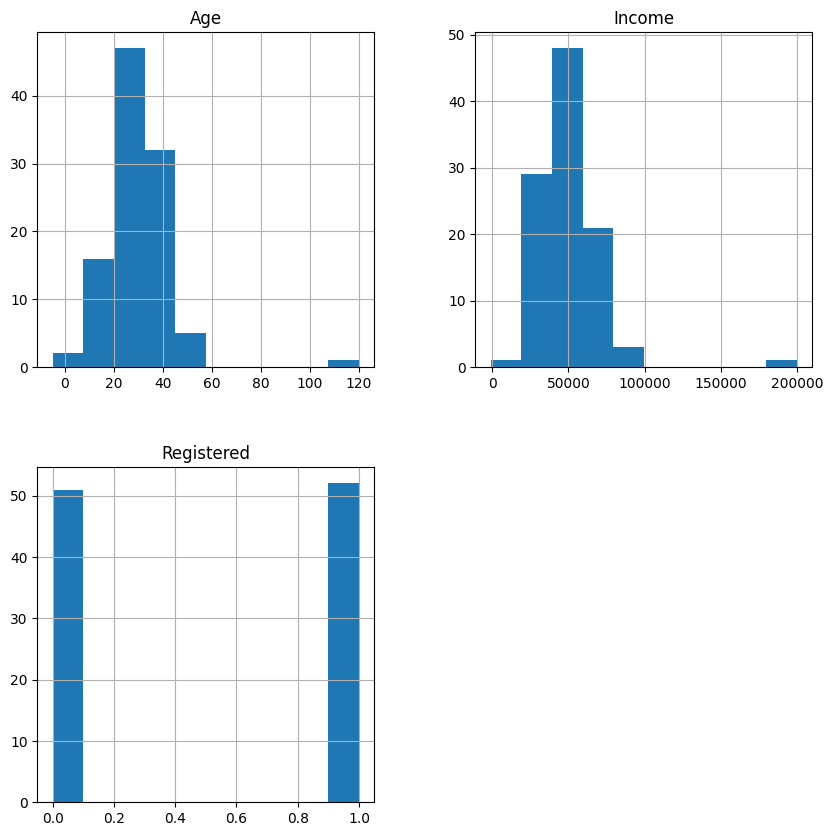

In [911]:
df_original.hist(figsize=(10,10))

### After the Data Cleaning

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Registered'}>, <Axes: >]], dtype=object)

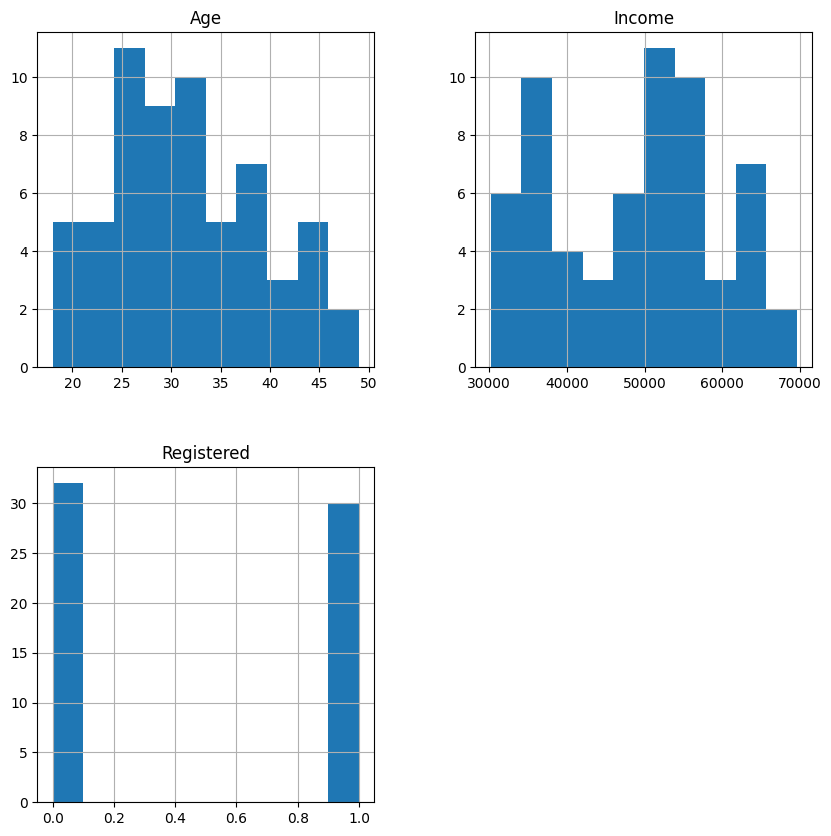

In [912]:
df.hist(figsize=(10,10))